# Load and install libraries

In [3]:
%pip install pygmsh

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pygmsh
import meshio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Create and plot the mesh

In [11]:
def mesh_plate(l, w, max_mesh_size):
    with pygmsh.geo.Geometry() as geom:
        # Define the rectangle geometry
        geom.add_rectangle(0, l, 0, w, 0, mesh_size=max_mesh_size)

        # Generate the mesh
        mesh = geom.generate_mesh()

    # Extract the node coordinates and elements
    nodes = mesh.points
    elements = mesh.cells_dict["triangle"]
    print(nodes)
    print(elements)

    return nodes, elements


def plot_mesh(nodes, elements, face_color=None, edge_color='k', alpha=0.7):
    """
    Plot a 3D triangular mesh using Poly3DCollection.

    Parameters:
        nodes: (N x 3) array of node coordinates
        elements: (M x 3) array of triangle vertex indices
        face_color: color for faces (None = no fill)
        edge_color: color for triangle edges
        alpha: transparency of triangles
    """

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Build list of triangle vertex coordinate arrays
    triangles = [nodes[elem] for elem in elements]

    mesh = Poly3DCollection(
        triangles,
        facecolors=face_color,
        edgecolors=edge_color,
        linewidths=0.8,
        alpha=alpha
    )

    ax.add_collection3d(mesh)

    # Auto-scale plot to fit mesh
    x, y, z = nodes[:, 0], nodes[:, 1], nodes[:, 2]
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_zlim([z.min(), z.max()])

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("3D Mesh Visualization")

    plt.tight_layout()
    plt.show()


[[0.      0.      0.     ]
 [0.1     0.      0.     ]
 [0.1     0.01    0.     ]
 [0.      0.01    0.     ]
 [0.0125  0.      0.     ]
 [0.025   0.      0.     ]
 [0.0375  0.      0.     ]
 [0.05    0.      0.     ]
 [0.0625  0.      0.     ]
 [0.075   0.      0.     ]
 [0.0875  0.      0.     ]
 [0.0875  0.01    0.     ]
 [0.075   0.01    0.     ]
 [0.0625  0.01    0.     ]
 [0.05    0.01    0.     ]
 [0.0375  0.01    0.     ]
 [0.025   0.01    0.     ]
 [0.0125  0.01    0.     ]
 [0.00625 0.005   0.     ]
 [0.09375 0.005   0.     ]
 [0.01875 0.005   0.     ]
 [0.08125 0.005   0.     ]
 [0.03125 0.005   0.     ]
 [0.06875 0.005   0.     ]
 [0.04375 0.005   0.     ]
 [0.05625 0.005   0.     ]]
[[15 16 22]
 [ 9 10 21]
 [10  1 19]
 [17  3 18]
 [13 14 25]
 [16 17 20]
 [ 6  7 24]
 [12 13 23]
 [ 8  9 23]
 [ 4  5 20]
 [14 15 24]
 [ 7  8 25]
 [ 0  4 18]
 [ 2 11 19]
 [11 12 21]
 [ 5  6 22]
 [14  7 25]
 [ 7 14 24]
 [13  8 23]
 [16  5 22]
 [10 11 21]
 [ 5 16 20]
 [ 3  0 18]
 [ 1  2 19]
 [ 4 17 1

C:\Users\natha\AppData\Local\Temp/ipykernel_40876/3696032734.py:50: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim([z.min(), z.max()])


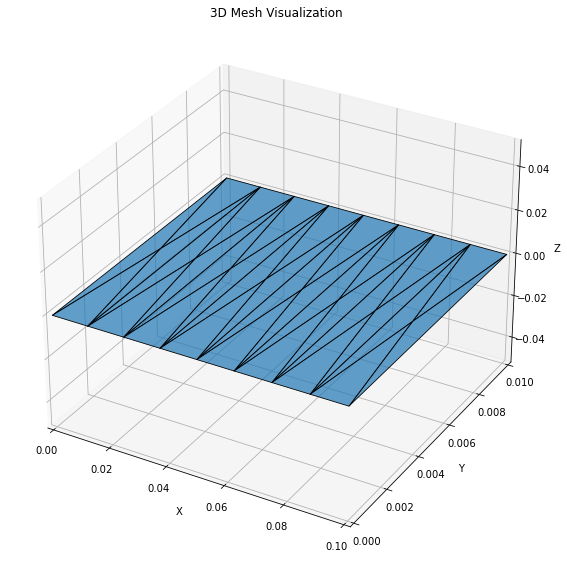

In [12]:

# Define your parameters
l = 0.1  # Length of the rectangle
w = 0.01  # Width of the rectangle
h =  0.002 # Thickness of the rectangle
max_mesh_size = 0.0125

Y = 10e7	# Young's Modulus
rho = 1000	# Density
A = w * h	# Cross-sectional Area
I  = (w * h**3) / 12  # Area Moment of Inertia

g = -9.81	# Gravitational acceleration
q = rho*A*g # Distributed load due to gravity

# Generate mesh
nodes, elements = mesh_plate(l, w, max_mesh_size)

# Plot the mesh
plot_mesh(nodes, elements)